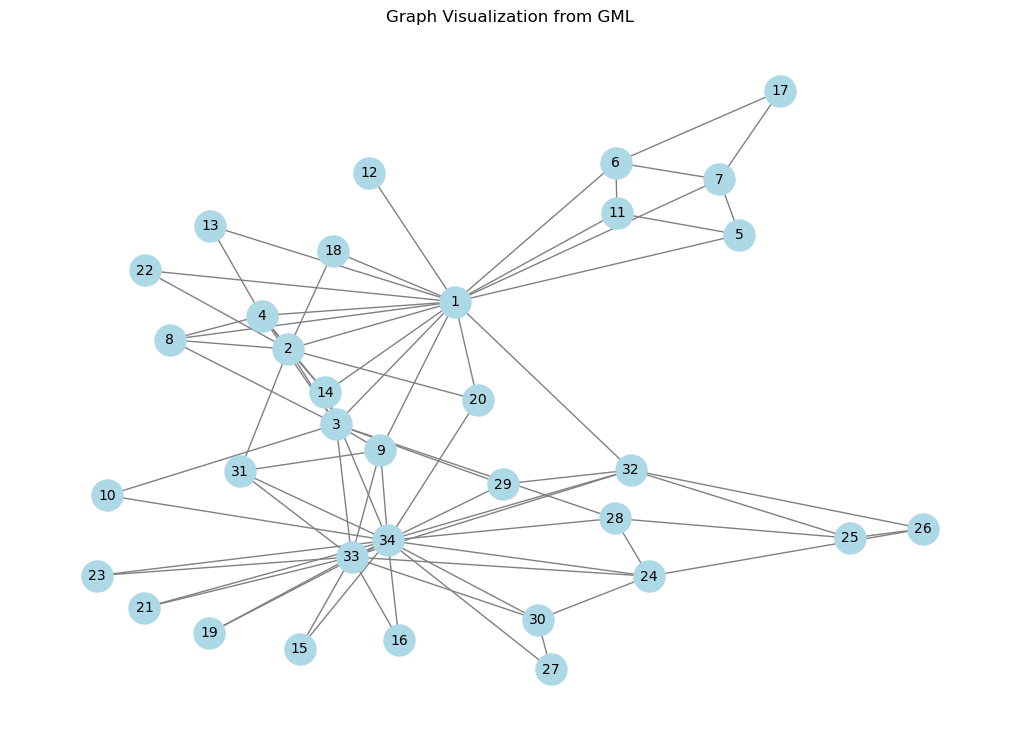

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

file_path = "/Users/efang/Desktop/coding/Intro-to-ML/CSDS446/data/karate.gml"  
G = nx.read_gml(file_path)
pos = nx.spring_layout(G, seed=42)  
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray", font_size=10)
plt.title("Graph Visualization from GML")
plt.show()


In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.metrics import roc_auc_score

In [17]:


edges_to_remove = [(1, 5), (2, 4), (3, 29), (6, 17), (9, 34), (16, 33), (24, 26), (25, 32)]
ground_truth_edges = [(u, v) for u, v in edges_to_remove if G.has_edge(u, v)]
G.remove_edges_from(ground_truth_edges)

non_edges = list(nx.non_edges(G))
random_scores = {pair: random.random() for pair in non_edges}

def compute_link_prediction(G, method):
    scores = {}
    if method == "preferential_attachment":
        scores = {(u, v): score for u, v, score in nx.preferential_attachment(G)}
    elif method == "common_neighbors":
        scores = {(u, v): len(list(nx.common_neighbors(G, u, v))) for u, v in non_edges}
    elif method == "jaccard":
        scores = {(u, v): score for u, v, score in nx.jaccard_coefficient(G)}
    elif method == "adamic_adar":
        scores = {(u, v): score for u, v, score in nx.adamic_adar_index(G)}
    return scores

methods = ["preferential_attachment", "common_neighbors", "jaccard", "adamic_adar"]
scores_dict = {method: compute_link_prediction(G, method) for method in methods}

removed_edges_set = set(ground_truth_edges)
non_edges = [tuple(sorted(edge)) for edge in non_edges]

def evaluate_method(scores):
    y_true, y_scores = [], []
    for pair in non_edges:
        y_true.append(1 if pair in removed_edges_set else 0)
        y_scores.append(scores.get(pair, 0))
    return roc_auc_score(y_true, y_scores)

# results
evaluation_results = {method: evaluate_method(scores) for method, scores in scores_dict.items()}
evaluation_results["random_guessing"] = evaluate_method(random_scores)
results_df = pd.DataFrame.from_dict(evaluation_results, orient="index", columns=["AUC-ROC Score"])
print(results_df)

                         AUC-ROC Score
preferential_attachment       0.695652
common_neighbors              0.669643
jaccard                       0.578675
adamic_adar                   0.730461
random_guessing               0.474120
